# Decision Tree

### Pseudocode

- Select Root node
    - Partition Data into respective groups
        - Create a decison node
            - Partition Data into respective groups

What is entropy?

measures the homogenity of sample
- -pLogp - qLogq
- p=Probability of event happening
- q=Probability of event not happening

In [1]:
#Techie     46
#Non-techie 15

In [2]:
#p=46/(46+15)=0.75
#q=15/(46+15)=0.25

In [3]:
import math

In [4]:
-0.75*(math.log(0.75,2))-0.25*(math.log(0.25,2)) #Entropy(Emp)

0.8112781244591328

In [5]:
help(math.log)

Help on built-in function log in module math:

log(...)
    log(x, [base=math.e])
    Return the logarithm of x to the given base.
    
    If the base not specified, returns the natural logarithm (base e) of x.



In [6]:
#Dresscodes          Techie      Non-Techie     Total 
#Formals               6             8           14
#Casuals              31             4           35 
#Business Casuals      9             3           12

In [7]:
#Entropy(Employee,Dresscode)=Prob(Formals)*ent_formals

In [8]:
(14/61)*(-0.42*(math.log(0.42,2))-0.57*(math.log(0.57,2)))

0.22673045952957271

In [9]:
(35/61)*(-0.88*(math.log(0.88,2))-0.11*(math.log(0.11,2)))

0.2941034654083912

In [10]:
(12/61)*(-0.75*(math.log(0.75,2))-0.25*(math.log(0.25,2)))

0.15959569661491138

In [11]:
0.22673045952957271+0.2941034654083912+0.15959569661491138 #Entropy(Dresscode,Emp)


0.6804296215528752

In [12]:
(-0.42*(math.log(0.42,2))-0.57*(math.log(0.57,2)))

0.9878970022359954

In [13]:
#Gain(Emp)=Entropy(Emp)-Entropy(DressCode,Emp)

0.8112781244591328-0.6804296215528752

0.1308485029062576

In [14]:
def Entropy(a,b):
    p=a/(a+b)
    q=b/(a+b)
    print(p,q)
    return -p*math.log(p,2)-q*math.log(q,2)

In [15]:
Entropy(9,3)

0.75 0.25


0.8112781244591328

 ## Summary
 
 Today we learned about Decision tree, its pseudocode, its components like roots and decision branches. And also learned about entropy and how to calculate entropy with different examples

In [16]:
 #               DressCode
 #                   |
#    ---------------------------------
#    |               |                |
#  Casual         Business        Formal
#   

In [17]:
#               --------------------Yes----------------Thal=3-------------------No-----------------------
#                        |                                                      |
#           ---no--pain Type=1,2,3---yes---                ----yes--- fluroscopy coloured=0.5---no---
#           |                             |                |                                        |
#         No hd            flouroscopy coloured<0.5     Exercise angina=0

### Gini index

Gini index uses the probabilty of finding a data point with one label as an indicator for homogenity. If the dataset is completel;y homogenous. if the dataset is completely homogenous, then the probaility if finding a datapoint with one of the label is 1 and the probability of finding a data point with the other label is zero. An empirical estimate of the probability oi of finding a datapoint with label i.

### Information gain

THe idea is to use the notion of entropy which is a central concpet of information gain theory.
Entropy quantifies the degree of disorder in the data

If entropy is zero if and only if from some  i, pi=1 and all the other pi=0, i.e when the dataset is completely homogenous


Entropy=sum(-PiLog(Pi,2)), where i=0->n

Information gain is the expected reduction in entropy for the collection of data point if we filter on a specific value of the attribute A

In [18]:
#!pip install pandas

In [19]:
#!pip install matplotlib

In [20]:
!pip list

Package                   Version
------------------------- ---------
anyio                     4.0.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.0
async-lru                 2.0.4
attrs                     23.1.0
Babel                     2.13.0
backcall                  0.2.0
beautifulsoup4            4.12.2
bleach                    6.1.0
blinker                   1.7.0
certifi                   2023.7.22
cffi                      1.16.0
charset-normalizer        3.3.0
click                     8.1.7
colorama                  0.4.6
comm                      0.1.4
contourpy                 1.2.1
cycler                    0.12.1
debugpy                   1.8.0
decorator                 5.1.1
defusedxml                0.7.1
executing                 2.0.0
face-recognition-models   0.3.0
Faker                     20.1.0
fastjsonschema            2.18.1
Flask                     3.0.0
fonttools            


[notice] A new release of pip is available: 23.3.1 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
#!pip install seaborn

In [22]:
#!pip install scikit-learn

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
ad_df=pd.read_csv("adult_dataset.csv")

In [25]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [27]:
ad_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [28]:
ad_df.shape

(32561, 15)

In [29]:
ad_df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [30]:
ad_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [31]:
ad_df1=ad_df[ad_df.workclass=="?"]
ad_df1

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,>50K
24,61,?,135285,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2603,32,United-States,<=50K
44,71,?,100820,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2489,15,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32534,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32541,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32543,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [32]:
ad_df=ad_df[ad_df["workclass"]!="?"]
ad_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [33]:
df_categorical=ad_df.select_dtypes(include=["object"])
df_categorical.apply(lambda x:x=="?",axis=1).sum()

workclass           0
education           0
marital.status      0
occupation          7
relationship        0
race                0
sex                 0
native.country    556
income              0
dtype: int64

In [34]:
ad_df=ad_df[ad_df["occupation"]!="?"]
ad_df=ad_df[ad_df["native.country"]!="?"]

In [35]:
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [36]:
from sklearn import preprocessing
df_categorical=ad_df.select_dtypes(include=["object"])
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States,<=50K


In [37]:
df_categorical["marital.status"].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [38]:
le=preprocessing.LabelEncoder()
df_categorical=df_categorical.apply(le.fit_transform)
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,2,11,6,3,1,4,0,38,0
3,2,5,0,6,4,4,0,38,0
4,2,15,5,9,3,4,0,38,0
5,2,11,0,7,4,4,0,38,0
6,2,0,5,0,4,4,1,38,0


In [39]:
ad_df=ad_df.drop(df_categorical.columns,axis=1)
ad_df=pd.concat([ad_df,df_categorical],axis=1)

In [40]:
ad_df["income"]=ad_df["income"].astype("category")

In [41]:
ad_df

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,82,132870,9,0,4356,18,2,11,6,3,1,4,0,38,0
3,54,140359,4,0,3900,40,2,5,0,6,4,4,0,38,0
4,41,264663,10,0,3900,40,2,15,5,9,3,4,0,38,0
5,34,216864,9,0,3770,45,2,11,0,7,4,4,0,38,0
6,38,150601,6,0,3770,40,2,0,5,0,4,4,1,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,0,0,40,2,15,4,10,1,4,1,38,0
32557,27,257302,12,0,0,38,2,7,2,12,5,4,0,38,0
32558,40,154374,9,0,0,40,2,11,2,6,0,4,1,38,1
32559,58,151910,9,0,0,40,2,11,6,0,4,4,0,38,0


In [42]:
from sklearn.model_selection import train_test_split
X=ad_df.drop(["income"],axis=1)
y=ad_df["income"]

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=90)
X_train.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
1050,35,189404,10,0,1740,40,3,15,2,11,0,4,1,38
15304,36,361888,9,0,0,45,2,11,2,13,0,4,1,38
3718,38,146042,13,3103,0,60,4,9,2,9,0,1,1,38
23579,55,277034,10,0,0,40,2,15,0,10,1,4,1,38
1814,39,122742,12,15024,0,55,3,7,2,3,0,4,1,38


In [44]:
from sklearn.tree import DecisionTreeClassifier

dt_default=DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [45]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

y_pred_default=dt_default.predict(X_test)

print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6759
           1       0.78      0.53      0.63      2290

    accuracy                           0.84      9049
   macro avg       0.82      0.74      0.77      9049
weighted avg       0.84      0.84      0.83      9049



In [46]:
print(confusion_matrix(y_test,y_pred_default))
accuracy_score(y_test,y_pred_default)

[[6419  340]
 [1075 1215]]


0.8436291302906398

In [47]:
#!pip install pydotplus

In [48]:
#!pip install graphviz

In [49]:
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus,graphviz

In [50]:
X.columns[1:]

Index(['fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'workclass', 'education', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'native.country'],
      dtype='object')

In [51]:
features=list(X.columns)


In [52]:
features

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

In [53]:
len(features)

14

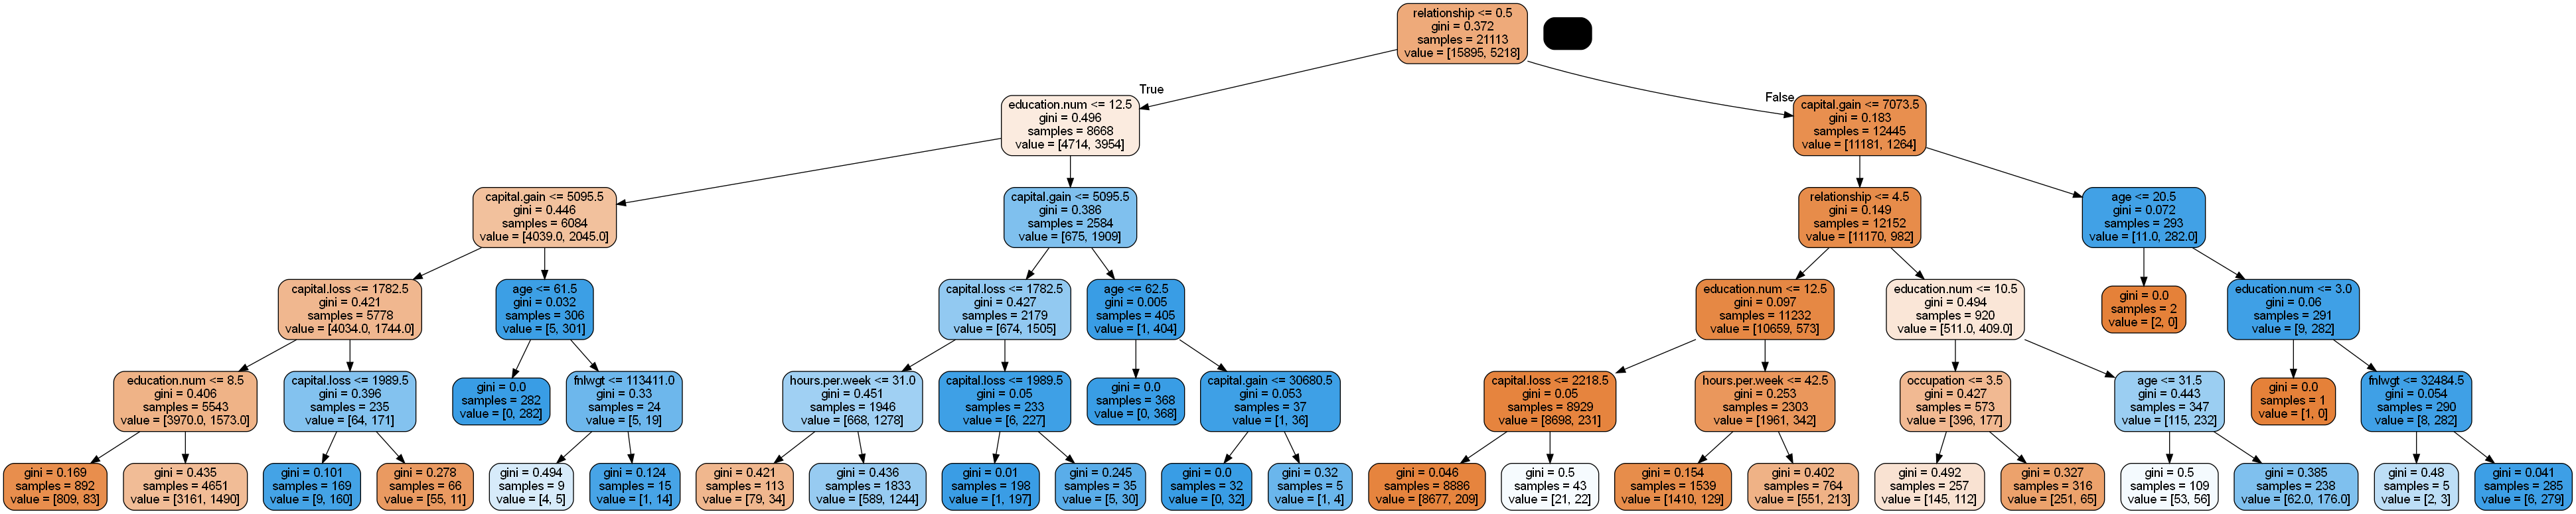

In [54]:
dot_data=StringIO()
export_graphviz(dt_default,out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [56]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds=5

parameters={"max_depth":range(1,40)}

dtree=DecisionTreeClassifier(criterion="gini",random_state=100)

tree=GridSearchCV(dtree,parameters,cv=n_folds,scoring="accuracy",return_train_score=True)
tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [57]:
scores=tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.020924,0.002349,0.005121,0.000823,1,{'max_depth': 1},0.752782,0.752782,0.752782,0.752961,...,0.752854,0.000087,39,0.752872,0.752872,0.752872,0.752827,0.752827,0.752854,0.000022
1,0.034662,0.005282,0.005384,0.001370,2,{'max_depth': 2},0.820033,0.826664,0.820744,0.822833,...,0.823616,0.003116,18,0.825340,0.823505,0.824985,0.824463,0.823219,0.824303,0.000822
2,0.047166,0.003932,0.005261,0.001389,3,{'max_depth': 3},0.832820,0.841345,0.834241,0.834912,...,0.837494,0.004432,12,0.838603,0.837478,0.839254,0.839027,0.836777,0.838228,0.000949
3,0.051988,0.002685,0.005145,0.001535,4,{'max_depth': 4},0.839214,0.847265,0.845371,0.842729,...,0.845593,0.004743,9,0.849615,0.849911,0.849734,0.843822,0.847789,0.848174,0.002307
4,0.059344,0.005673,0.004604,0.001009,5,{'max_depth': 5},0.842292,0.850107,0.849159,0.841781,...,0.847914,0.005380,7,0.854589,0.856009,0.853760,0.846901,0.851933,0.852638,0.003157


In [58]:
pd.DataFrame(scores).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

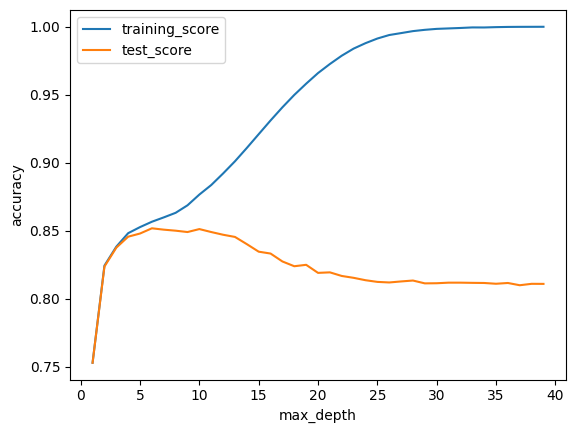

In [59]:
plt.figure()
plt.plot(scores["param_max_depth"],scores["mean_train_score"],label="training_score")
plt.plot(scores["param_max_depth"],scores["mean_test_score"],label="test_score")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [60]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_fold=5

parameters={"min_samples_leaf":range(5,200,20)}

dtree=DecisionTreeClassifier(criterion="gini",random_state=100)

tree=GridSearchCV(dtree,parameters,cv=n_folds,scoring="accuracy",return_train_score=True)
tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [61]:
scores=tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.158481,0.015483,0.007546,0.002982,5,{'min_samples_leaf': 5},0.839214,0.826664,0.822875,0.834912,...,0.832994,0.007127,10,0.916223,0.918828,0.917407,0.914215,0.915044,0.916343,0.001645
1,0.106780,0.009228,0.004305,0.000824,25,{'min_samples_leaf': 25},0.851527,0.846318,0.845607,0.860966,...,0.852840,0.006493,3,0.872647,0.875903,0.873653,0.870641,0.873542,0.873277,0.001700
2,0.125113,0.008496,0.008216,0.002267,45,{'min_samples_leaf': 45},0.854606,0.853895,0.853422,0.855992,...,0.855776,0.002736,1,0.867555,0.871344,0.869035,0.863655,0.867859,0.867890,0.002502
3,0.131890,0.032647,0.006711,0.002196,65,{'min_samples_leaf': 65},0.856500,0.847265,0.853185,0.854098,...,0.854877,0.005207,2,0.861575,0.865127,0.862996,0.861228,0.862294,0.862644,0.001383
4,0.102899,0.010412,0.007048,0.002836,85,{'min_samples_leaf': 85},0.850817,0.842529,0.850580,0.854571,...,0.851466,0.005385,4,0.858792,0.862818,0.859147,0.858801,0.859866,0.859885,0.001518


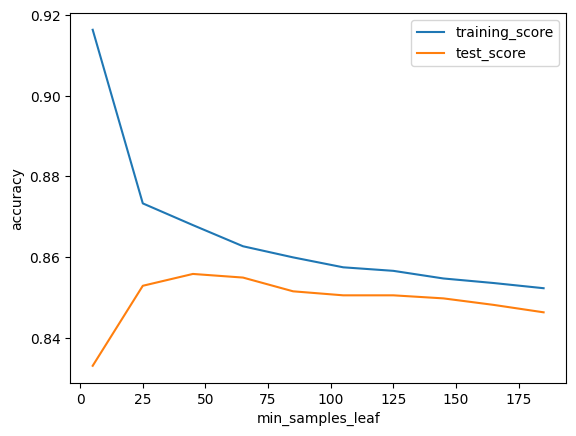

In [62]:
plt.figure()
plt.plot(scores["param_min_samples_leaf"],scores["mean_train_score"],label="training_score")
plt.plot(scores["param_min_samples_leaf"],scores["mean_test_score"],label="test_score")
plt.xlabel("min_samples_leaf")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [63]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_fold=5

parameters={"min_samples_split":range(5,200,20)}

dtree=DecisionTreeClassifier(criterion="gini",random_state=100)

tree=GridSearchCV(dtree,parameters,cv=n_folds,scoring="accuracy",return_train_score=True)
tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

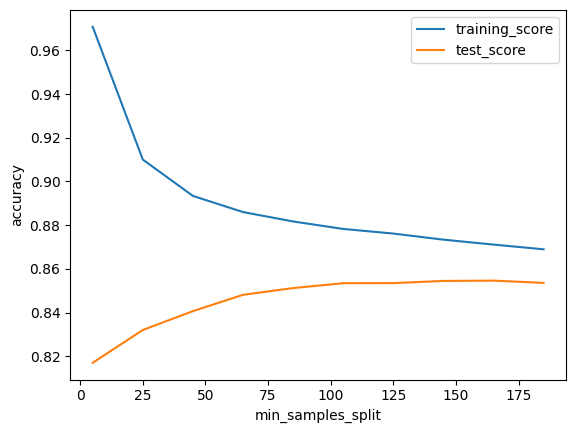

In [64]:
scores=tree.cv_results_
pd.DataFrame(scores).head()
plt.figure()
plt.plot(scores["param_min_samples_split"],scores["mean_train_score"],label="training_score")
plt.plot(scores["param_min_samples_split"],scores["mean_test_score"],label="test_score")
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [85]:
param_grid={"max_depth":range(5,15,5)
           ,"min_samples_leaf":range(50,150,50)
           ,"min_samples_split":range(50,150,50)
           ,"criterion":["entropy","gini"]}

n_folds=5
dtree=DecisionTreeClassifier()

grid_search_fit=GridSearchCV(estimator=dtree,param_grid=param_grid, cv=n_folds,verbose=1)
grid_search_fit.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [86]:
cv_results=pd.DataFrame(grid_search_fit.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.071603,0.005608,0.004600,0.000611,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.838740,0.848923,0.842766,0.843913,0.849597,0.844788,0.004041,13
1,0.082771,0.005129,0.006069,0.001043,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.838740,0.848923,0.842766,0.843913,0.849597,0.844788,0.004041,13
2,0.068112,0.007559,0.005075,0.000122,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.838503,0.849159,0.840871,0.844623,0.848413,0.844314,0.004147,15
3,0.096145,0.038512,0.006263,0.002613,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.838503,0.849159,0.840871,0.844623,0.848413,0.844314,0.004147,15
4,0.141041,0.028206,0.005494,0.000670,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.852948,0.851527,0.852001,0.851729,0.854808,0.852603,0.001205,3
5,0.144861,0.036134,0.006585,0.001858,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.852948,0.851527,0.852001,0.851729,0.854808,0.852603,0.001205,3
6,0.105068,0.007390,0.005001,0.000800,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.846318,0.847975,0.846791,0.851966,0.851018,0.848814,0.002272,7
7,0.108662,0.005095,0.005306,0.000738,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.846318,0.847975,0.846791,0.851966,0.851018,0.848814,0.002272,7
8,0.056942,0.004562,0.004835,0.000524,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.841108,0.849633,0.849159,0.843676,0.857177,0.848151,0.005555,9
9,0.058834,0.004523,0.005101,0.000609,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.841108,0.849633,0.849159,0.843676,0.857177,0.848151,0.005555,9


In [87]:
print("best accuracy",grid_search_fit.best_score_)
print(grid_search_fit.best_estimator_)

best accuracy 0.8544499438178489
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [88]:
clf_gini=DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=10,min_samples_leaf=50,min_samples_split=50)
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

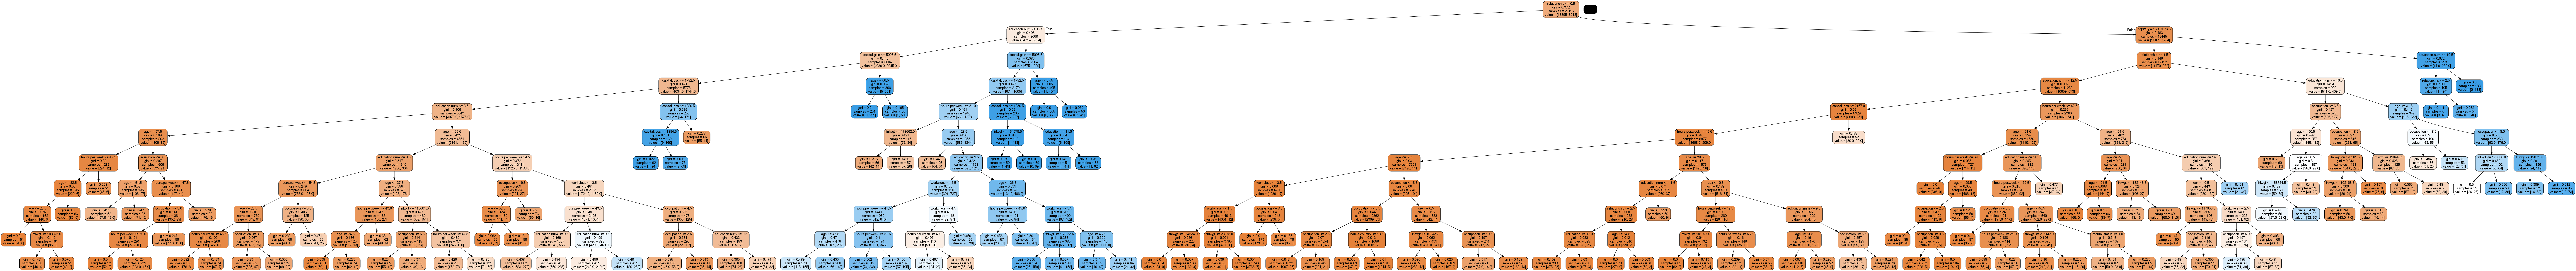

In [89]:
dot_data=StringIO()
export_graphviz(clf_gini,out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [90]:
clf_gini=DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=3,min_samples_leaf=50,min_samples_split=50)
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

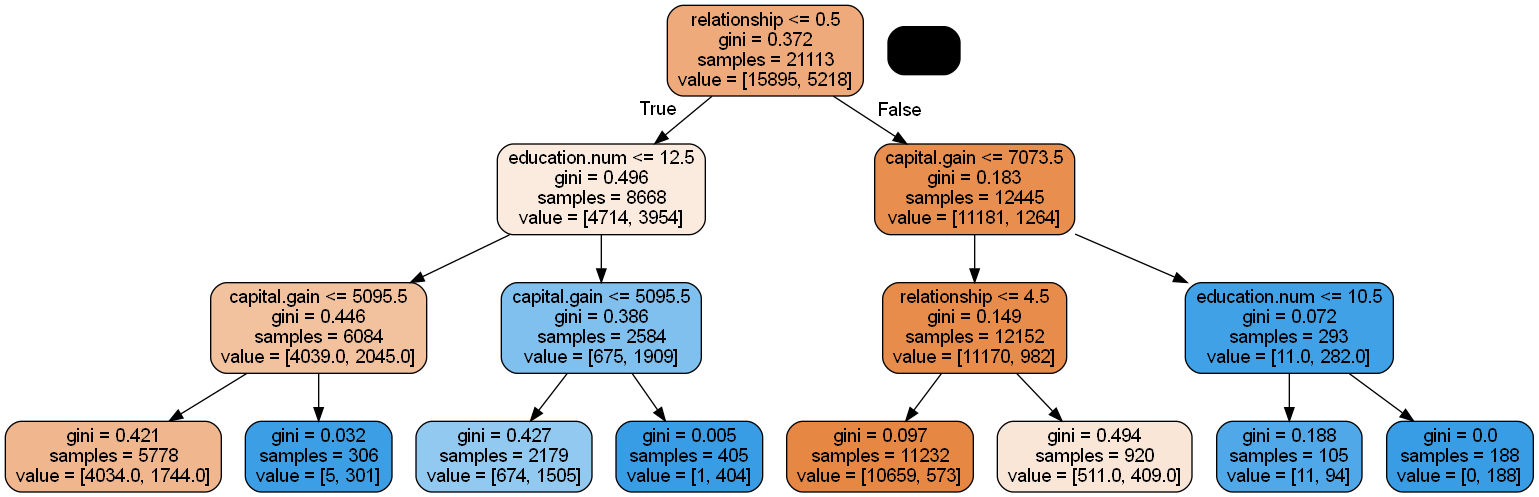

In [91]:
dot_data=StringIO()
export_graphviz(clf_gini,out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [94]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred=clf_gini.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6759
           1       0.77      0.47      0.58      2290

    accuracy                           0.83      9049
   macro avg       0.81      0.71      0.74      9049
weighted avg       0.82      0.83      0.82      9049



In [95]:
print(confusion_matrix(y_test,y_pred))

[[6439  320]
 [1213 1077]]


In [65]:
#ad_df.workclass.mode()

In [66]:
#ad_df.columns[(ad_df == '?').any()]


In [67]:
#ad_df.occupation.unique()

In [68]:
#ad_df.occupation.mode()

In [69]:
#ad_df["native.country"].unique()

In [70]:
#ad_df["native.country"].mode()

In [71]:
"""def replace_question_mark_with_mode(df):
    for column in df.columns:
        mode = df[column].mode()[0]
        df[column] = df[column].replace('?', mode)
    return df"""

"def replace_question_mark_with_mode(df):\n    for column in df.columns:\n        mode = df[column].mode()[0]\n        df[column] = df[column].replace('?', mode)\n    return df"

In [72]:
#replace_question_mark_with_mode(ad_df)

In [73]:
#ad_df.columns[(ad_df == '?').any()]


## Summary

Today we learned about decision trees, including entropy and Gini index for measuring data impurity. Implemented a decision tree classifier using Python, handling data preparation, training, and evaluation. We also performed hyperparameter tuning with GridSearchCV and visualized the decision tree using export_graphviz and pydotplus.Used GridSearchCV with KFold cross-validation to optimize DecisionTreeClassifier parameters, plotting accuracy against max_depth, min_samples_leaf, and min_samples_split.